<a href="https://colab.research.google.com/github/SatinderKaur1944/Project/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Display the first few rows of the dataset
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Describe the data
print(data.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Since the Iris dataset does not have missing values, we skip imputation


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


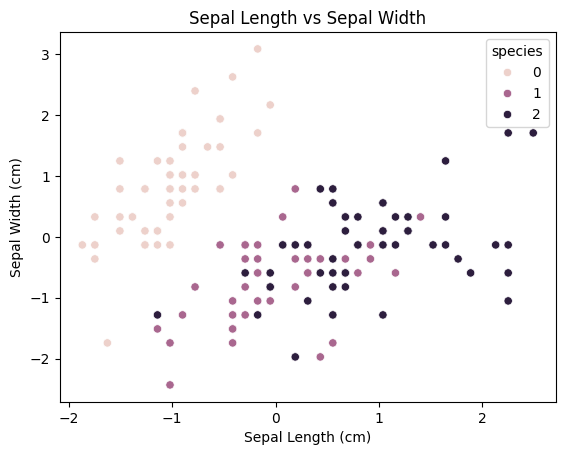

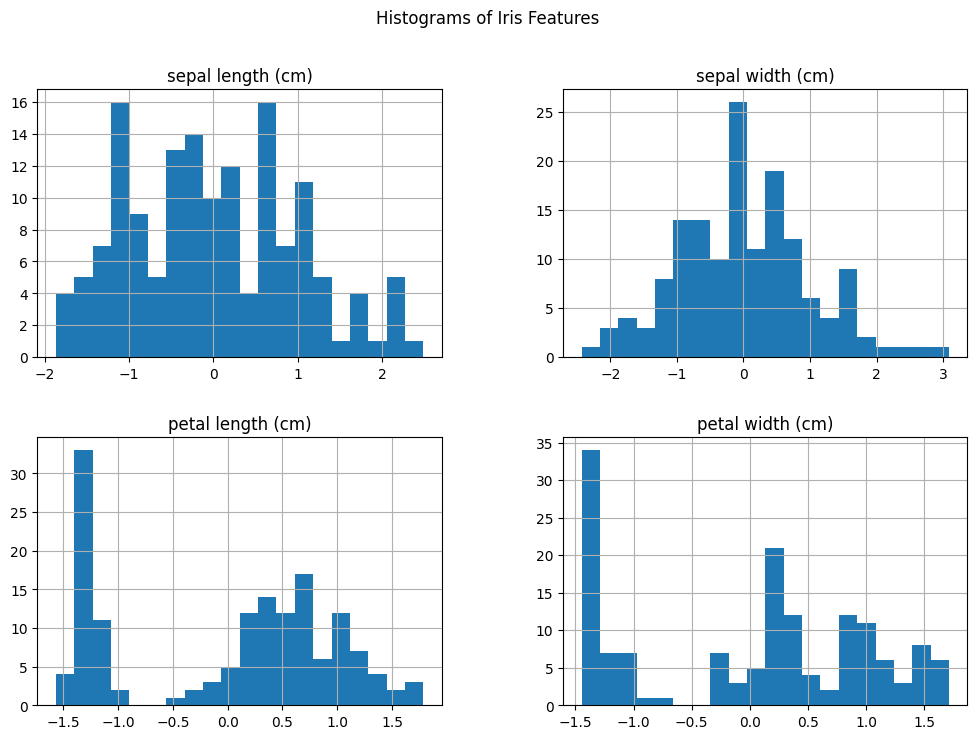

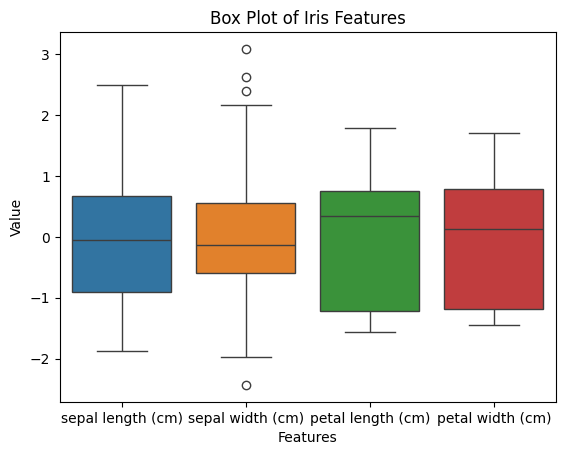

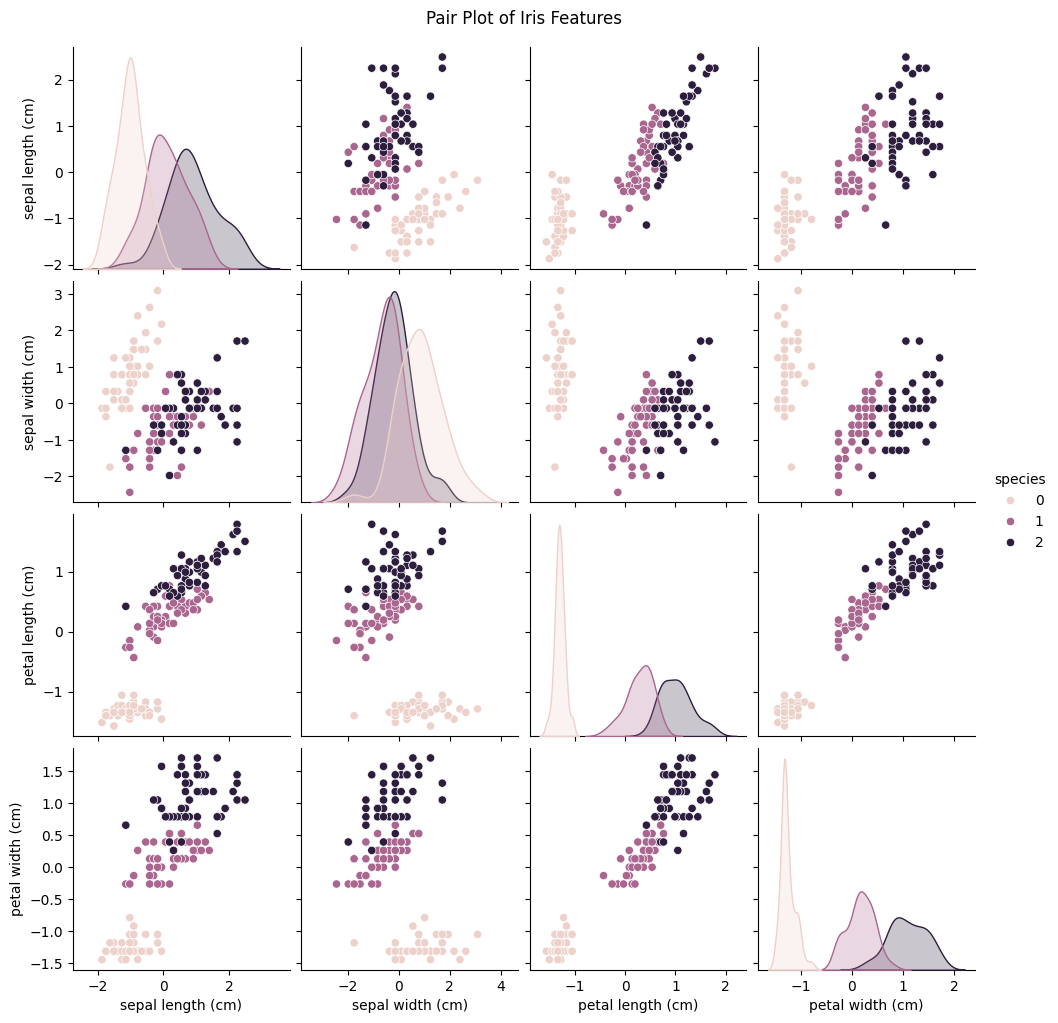

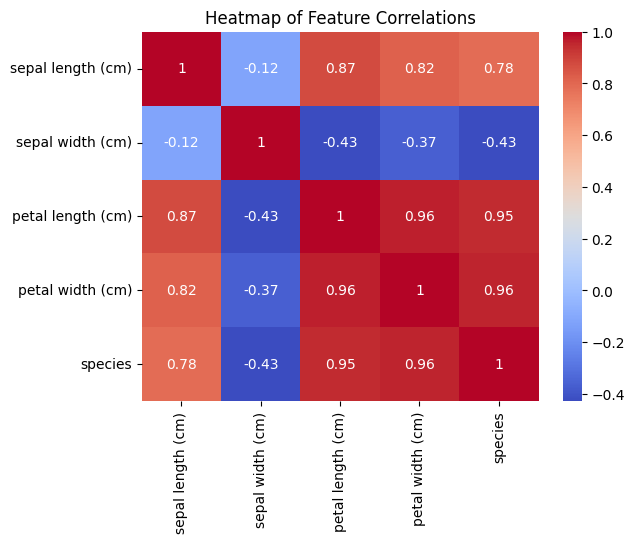

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Histogram
data[iris.feature_names].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Iris Features')
plt.show()

# Box plot
sns.boxplot(data=data[iris.feature_names])
plt.title('Box Plot of Iris Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

# Pair plot
sns.pairplot(data, hue='species')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()

# Heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the feature data
scaler = StandardScaler()
data[iris.feature_names] = scaler.fit_transform(data[iris.feature_names])

# Display the normalized data
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X = data[iris.feature_names]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(random_state=42)


In [ ]:
# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Test the model
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Example new data point (normalized)
new_data = [[5.1, 3.5, 1.4, 0.2]]
new_data_normalized = scaler.transform(new_data)

# Predict the species
predicted_species = model.predict(new_data_normalized)
species_name = iris.target_names[predicted_species[0]]
print(f'The predicted species for the input data {new_data} is: {species_name}')


The predicted species for the input data [[5.1, 3.5, 1.4, 0.2]] is: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
